In [7]:
pip install yfinance


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
# Import all the libraries

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression


In [9]:
# Upload the DGCONTENT.NS data using yfinance for train 
stock_symbol = "DGCONTENT.NS"

data = yf.download(stock_symbol)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-18,16.000000,16.00,15.200000,15.200000,15.200000,35352
2019-06-19,15.250000,15.80,14.450000,14.900000,14.900000,30377
2019-06-20,14.200000,15.00,14.200000,14.200000,14.200000,21337
2019-06-21,13.500000,14.90,13.500000,14.500000,14.500000,17213
2019-06-24,14.500000,14.65,13.800000,13.800000,13.800000,27740
...,...,...,...,...,...,...
2023-11-10,19.250000,19.40,18.150000,18.400000,18.400000,11317
2023-11-13,19.299999,19.75,19.000000,19.549999,19.549999,11130
2023-11-15,20.100000,20.10,19.000000,19.200001,19.200001,11037


In [10]:
# Initialize the data in X and y 
data['date_num'] = np.arange(len(data))

X = data['date_num'].values.reshape(-1,1)
y = data['Close'].values.reshape(-1,1)

In [11]:
# Split the data to training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (876, 1)
Shape of X_test: (219, 1)
Shape of y_train: (876, 1)
Shape of y_test: (219, 1)


In [12]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
print("Intercept: ", regressor.intercept_)
print("Slope: ", regressor.coef_)

Intercept:  [5.57526143]
Slope:  [[0.01279252]]


In [14]:
# Predicted data from Actual data

y_pred = regressor.predict(X_test)

df_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df_pred)

        Actual  Predicted
0    14.400000  15.604601
1    13.200000  15.054522
2    15.150000  15.131277
3    14.900000  18.201483
4     9.000000  11.702881
..         ...        ...
214  21.350000  13.954365
215  18.900000  19.506321
216  15.550000  16.704758
217  19.299999  14.082290
218  18.350000  14.197423

[219 rows x 2 columns]


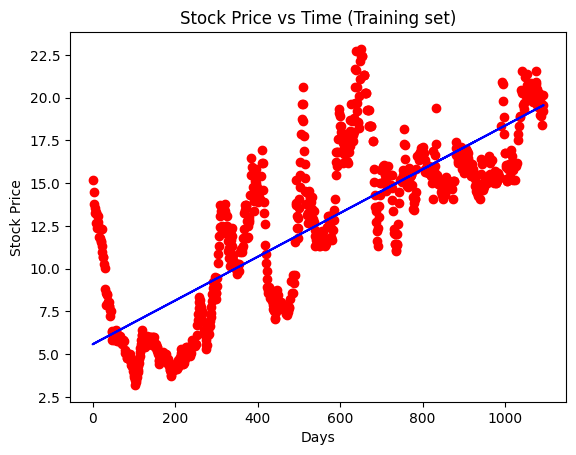

In [17]:
# Visualization the training data set using Matplotlib

plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Stock Price vs Time (Training set)')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.show() 

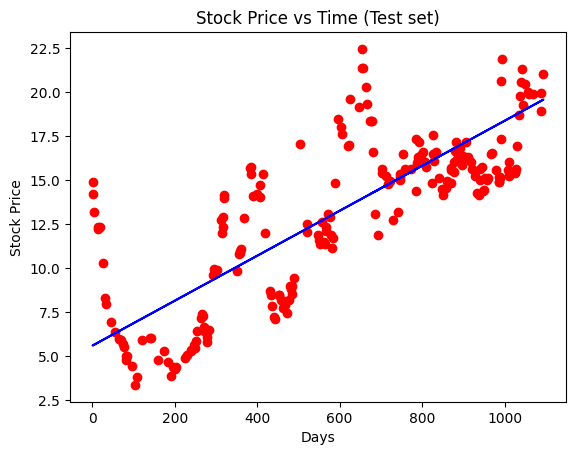

In [18]:
# Visualization the testing data set using Matplotlib

plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, regressor.predict(X_test), color='blue')
plt.title('Stock Price vs Time (Test set)')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.show()